<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Li%C3%A7%C3%A3o/Kaggle_Churn_Challenge_Logistic_Regression_15nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Labdata Churn Challenge 2020

Try to predict whether a client will churn the telco service
Cada linha representa um cliente e cada coluna representa uma informação a respeito daquele cliente.

Os dados incluem os seguintes grupos de variáveis:

•	Churn: representa se um cliente cancelou ou não os serviços contratados

•	Serviços que cada cliente contratou - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

•	Informações a respeito da conta do cliente – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

•	Informações demográficas – gender, age range, and if they have partners and dependents

The raw data contains 7043 rows (customers) and 21 columns (features).

In [1]:
import pandas as pd
import numpy as np

In [2]:
# url dos arquivos baixados do site https://www.kaggle.com/c/labdata-churn-challenge-2020/data e uploaded em github

url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

In [3]:
# carregando em dataframes:

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_sample_submission = pd.read_csv(url_sample_submission)

In [ ]:
df_train.shape

(5634, 21)

In [ ]:
5634/21     # verificando relação entre quantidade de linhas e variáveis

268.2857142857143

In [ ]:
df_test.shape

(1409, 20)

In [ ]:
1409/(1409+5634)      # test: 20%, train: 80%

0.20005679397983814

In [ ]:
df_sample_submission.shape

(1409, 2)

In [ ]:
df_train.head(1)  

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0


In [ ]:
df_test.head(1)

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.0,445.3


In [ ]:
df_sample_submission.head(1)

,id,Churn
0,5027,0


In [ ]:
df_train.isna().sum()

id                    0
gender                0
SeniorCitizen         0
Partner               0
Dependents          218
tenure              461
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod        99
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5416 non-null   object 
 5   tenure            5173 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
df_train[df_train['TotalCharges']==' ']

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
161,6755,Male,0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
416,5219,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
1766,6671,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
2145,937,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
3375,3827,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
3404,1083,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
4008,3332,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
5151,1341,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [ ]:
df_test[df_test['TotalCharges']==' ']

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
313,4381,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1063,489,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
1297,754,Male,0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,


In [4]:
df_train['TotalCharges'] = df_train['TotalCharges'].replace(' ', '0')

In [5]:
df_test['TotalCharges'] = df_test['TotalCharges'].replace(' ', '0')

In [ ]:
df_train[df_train['TotalCharges']==' ']

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df_test[df_test['TotalCharges']==' ']

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [6]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'])

In [7]:
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'])

In [8]:
df_train['TotalCharges'] = df_train['TotalCharges'].replace(0, df_train['TotalCharges'].median())

In [9]:
df_test['TotalCharges'] = df_test['TotalCharges'].replace(df_test['TotalCharges'].median())

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5416 non-null   object 
 5   tenure            5173 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [11]:
df_train['PaymentMethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

In [12]:
df_train['PaymentMethod'].fillna('Electronic check', inplace=True)

In [ ]:
df_train['Dependents'].value_counts()

No     3793
Yes    1623
Name: Dependents, dtype: int64

In [13]:
df_train['Dependents'].fillna('No',inplace = True)

In [14]:
df_train['tenure'].fillna(df_train['tenure'].median(), inplace=True)

In [ ]:
df_train.isna().sum()

id                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_test.isna().sum()

id                    0
gender                0
SeniorCitizen         0
Partner               0
Dependents           41
tenure              118
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod        30
MonthlyCharges        0
TotalCharges          0
dtype: int64

In [15]:
df_test['Dependents'].value_counts()

No     953
Yes    415
Name: Dependents, dtype: int64

In [16]:
df_test['PaymentMethod'].value_counts()

Electronic check             430
Credit card (automatic)      329
Mailed check                 313
Bank transfer (automatic)    307
Name: PaymentMethod, dtype: int64

In [17]:
df_test['Dependents'].fillna('No', inplace=True)

In [18]:
df_test['PaymentMethod'].fillna('Electronic check',inplace = True)

In [19]:
df_test['tenure'].fillna(df_test['tenure'].median(),inplace = True)

In [20]:
df_test.isna().sum()

id                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
df_train.shape

(5634, 21)

In [21]:
# Dividindo df_train em df_X_train e df_y_train:
df_X_train = df_train.drop('Churn',axis=1)
df_X_train.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Electronic check,45.05,2560.10
1,6731,Male,0,Yes,Yes,29.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80


In [22]:
df_X_train.shape

(5634, 20)

In [23]:
df_y_train = df_train['Churn']
df_y_train.shape

(5634,)

In [24]:
df_X_test = df_test
df_X_test.shape

(1409, 20)

In [25]:
y_test = df_sample_submission['Churn']
y_test.shape

(1409,)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
df_X_train.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
df_X_train['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df_X_train['InternetService'].unique()

array(['DSL', 'No', 'Fiber optic'], dtype=object)

In [ ]:
df_X_train['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_X_train['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_X_train['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_X_train_1 = df_X_train.copy()

In [ ]:
X_teste = df_X_test.copy()

In [ ]:
# não adianta fazer a transformação para categórica nesse momento, pois ao fazer o LabelEncoder, as novas variáveis são inteiras e precisa converter de novo para categórica:
#df_X_train_1 = df_X_train.copy()
#df_X_train_1 = df_X_train_1.astype({'gender': 'category', 'SeniorCitizen': 'category', 'Partner': 'category', 'Dependents': 'category',
#       'PhoneService': 'category', 'MultipleLines': 'category', 'InternetService': 'category', 'OnlineSecurity': 'category',
#       'OnlineBackup': 'category', 'DeviceProtection': 'category', 'TechSupport': 'category', 'StreamingTV': 'category',
#       'StreamingMovies': 'category', 'Contract': 'category'})

In [ ]:
# Encoding variáveis nominais:

# df_A5['salario_cat'] = df_A5['salario'].map({'baixo': 1, 'medio': 2, 'alto': 3})
# ou LabelEncoder
# ou pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
# pd.get_dummies(df_X_train_1, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
#       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
#       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
#       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
    # 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    # 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    # 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    # 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
df_X_train_1['gender_le'] = le.fit_transform(df_X_train_1['gender'])
df_X_train_1['SeniorCitizen_le'] = le.fit_transform(df_X_train_1['SeniorCitizen'])
df_X_train_1['Partner_le'] = le.fit_transform(df_X_train_1['Partner'])
df_X_train_1['Dependents_le'] = le.fit_transform(df_X_train_1['Dependents'])
df_X_train_1['PhoneService_le'] = le.fit_transform(df_X_train_1['PhoneService'])
df_X_train_1['MultipleLines_le'] = le.fit_transform(df_X_train_1['MultipleLines'])
df_X_train_1['InternetService_le'] = le.fit_transform(df_X_train_1['InternetService'])
df_X_train_1['OnlineSecurity_le'] = le.fit_transform(df_X_train_1['OnlineSecurity'])
df_X_train_1['OnlineBackup_le'] = le.fit_transform(df_X_train_1['OnlineBackup'])
df_X_train_1['DeviceProtection_le'] = le.fit_transform(df_X_train_1['DeviceProtection'])
df_X_train_1['TechSupport_le'] = le.fit_transform(df_X_train_1['TechSupport'])
df_X_train_1['StreamingTV_le'] = le.fit_transform(df_X_train_1['StreamingTV'])
df_X_train_1['StreamingMovies_le'] = le.fit_transform(df_X_train_1['StreamingMovies'])
df_X_train_1['Contract_le'] = le.fit_transform(df_X_train_1['Contract'])
df_X_train_1['PaperlessBilling_le'] = le.fit_transform(df_X_train_1['PaperlessBilling'])
df_X_train_1['PaymentMethod_le'] = le.fit_transform(df_X_train_1['PaymentMethod'])


In [ ]:
df_X_train_1.shape

(5634, 36)

In [ ]:
X_teste['gender_le'] = le.fit_transform(X_teste['gender'])
X_teste['SeniorCitizen_le'] = le.fit_transform(X_teste['SeniorCitizen'])
X_teste['Partner_le'] = le.fit_transform(X_teste['Partner'])
X_teste['Dependents_le'] = le.fit_transform(X_teste['Dependents'])
X_teste['PhoneService_le'] = le.fit_transform(X_teste['PhoneService'])
X_teste['MultipleLines_le'] = le.fit_transform(X_teste['MultipleLines'])
X_teste['InternetService_le'] = le.fit_transform(X_teste['InternetService'])
X_teste['OnlineSecurity_le'] = le.fit_transform(X_teste['OnlineSecurity'])
X_teste['OnlineBackup_le'] = le.fit_transform(X_teste['OnlineBackup'])
X_teste['DeviceProtection_le'] = le.fit_transform(X_teste['DeviceProtection'])
X_teste['TechSupport_le'] = le.fit_transform(X_teste['TechSupport'])
X_teste['StreamingTV_le'] = le.fit_transform(X_teste['StreamingTV'])
X_teste['StreamingMovies_le'] = le.fit_transform(X_teste['StreamingMovies'])
X_teste['Contract_le'] = le.fit_transform(X_teste['Contract'])
X_teste['PaperlessBilling_le'] = le.fit_transform(X_teste['PaperlessBilling'])
X_teste['PaymentMethod_le'] = le.fit_transform(X_teste['PaymentMethod'])

In [ ]:
X_teste.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_le', 'SeniorCitizen_le',
       'Partner_le', 'Dependents_le', 'PhoneService_le', 'MultipleLines_le',
       'InternetService_le', 'OnlineSecurity_le', 'OnlineBackup_le',
       'DeviceProtection_le', 'TechSupport_le', 'StreamingTV_le',
       'StreamingMovies_le', 'Contract_le', 'PaperlessBilling_le',
       'PaymentMethod_le'],
      dtype='object')

In [ ]:
X_teste = X_teste.drop(['id','gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],axis=1)

In [ ]:
X_teste.shape

(1409, 19)

In [ ]:
df_X_train_1.shape

(5634, 36)

In [ ]:
df_X_train_1.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_le', 'SeniorCitizen_le',
       'Partner_le', 'Dependents_le', 'PhoneService_le', 'MultipleLines_le',
       'InternetService_le', 'OnlineSecurity_le', 'OnlineBackup_le',
       'DeviceProtection_le', 'TechSupport_le', 'StreamingTV_le',
       'StreamingMovies_le', 'Contract_le', 'PaperlessBilling_le',
       'PaymentMethod_le'],
      dtype='object')

In [ ]:
df_X_train_1 = df_X_train_1.drop({'id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'}, 
       axis=1       )

df_X_train_1.shape

(5634, 19)

In [ ]:
df_X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tenure               5634 non-null   float64
 1   MonthlyCharges       5634 non-null   float64
 2   TotalCharges         5634 non-null   float64
 3   gender_le            5634 non-null   int64  
 4   SeniorCitizen_le     5634 non-null   int64  
 5   Partner_le           5634 non-null   int64  
 6   Dependents_le        5634 non-null   int64  
 7   PhoneService_le      5634 non-null   int64  
 8   MultipleLines_le     5634 non-null   int64  
 9   InternetService_le   5634 non-null   int64  
 10  OnlineSecurity_le    5634 non-null   int64  
 11  OnlineBackup_le      5634 non-null   int64  
 12  DeviceProtection_le  5634 non-null   int64  
 13  TechSupport_le       5634 non-null   int64  
 14  StreamingTV_le       5634 non-null   int64  
 15  StreamingMovies_le   5634 non-null   i

In [ ]:
df_X_train_1 = df_X_train_1.astype({'gender_le': 'category', 'SeniorCitizen_le': 'category', 'Partner_le': 'category', 'Dependents_le': 'category',
       'PhoneService_le': 'category', 'MultipleLines_le': 'category', 'InternetService_le': 'category', 'OnlineSecurity_le': 'category',
       'OnlineBackup_le': 'category', 'DeviceProtection_le': 'category', 'TechSupport_le': 'category', 'StreamingTV_le': 'category',
       'StreamingMovies_le': 'category', 'Contract_le': 'category', 'PaperlessBilling_le':'category', 'PaymentMethod_le':'category'})

In [ ]:
df_X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   tenure               5634 non-null   float64 
 1   MonthlyCharges       5634 non-null   float64 
 2   TotalCharges         5634 non-null   float64 
 3   gender_le            5634 non-null   category
 4   SeniorCitizen_le     5634 non-null   category
 5   Partner_le           5634 non-null   category
 6   Dependents_le        5634 non-null   category
 7   PhoneService_le      5634 non-null   category
 8   MultipleLines_le     5634 non-null   category
 9   InternetService_le   5634 non-null   category
 10  OnlineSecurity_le    5634 non-null   category
 11  OnlineBackup_le      5634 non-null   category
 12  DeviceProtection_le  5634 non-null   category
 13  TechSupport_le       5634 non-null   category
 14  StreamingTV_le       5634 non-null   category
 15  StreamingMovies_le   

In [ ]:
df_X_train_1.head()

,tenure,MonthlyCharges,TotalCharges,gender_le,SeniorCitizen_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,56.0,45.05,2560.10,0,0,0,0,0,1,0,2,2,2,2,0,0,2,0,3
1,29.0,19.65,332.65,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,4
2,60.0,110.80,6640.70,0,0,1,0,1,2,1,0,2,2,2,2,2,2,1,1
3,37.0,101.90,3545.35,0,0,0,0,1,2,1,0,2,2,0,2,2,0,1,0
4,29.0,70.75,1974.80,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,2


In [ ]:
# FAZER ??? 
# SE SIM, PRECISA SUBSTITUIR NOMES DO DATAFRAME, VARIÁVEIS, ETC
# Avaliação do pressuposto de variáveis preditoras independentes 


#from scipy.stats import spearmanr
#coef, p = spearmanr(df_titanic['pclass'], df_titanic['age'])
#print('Coeficiente de Correlação de Spearman: %.3f' % coef)

# Interpretação da significância:
#alpha = 0.05
#if p > alpha:
#	print('Amostras NÃO correlacionadas (falha em rejeitar H0) p = %.3f' %p)
#else:
#	print('Amostras correlacionadas (Rejeita H0) p = %.3f' %p)

In [ ]:
# FUNÇÃO PARA TRATAMENTO DE OUTLIERS: 

from scipy import stats 

def trata_outliers(df, coluna):
    sns.boxplot(x = coluna, data = df)

    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    mediana = df[coluna].median()
    print(f"Mediana: {mediana}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[df[coluna] > limite_superior_outliers, coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(mediana, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_superior_outliers


In [ ]:
# Aplicando a função de tratamento de outliers nas variáveis numéricas: 'tenure', 'MonthlyCharges' e 'TotalCharges'
# CONCLUSÃO: não há outliers

IQR: 43.0
Limite inferior para outlier: -54.5; Limite superior para outliers: 117.5
Mediana: 29.0


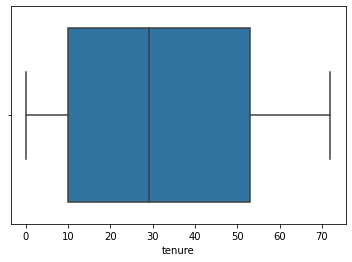

In [ ]:
df_X_train_1, limite_superior_outliers = trata_outliers(df = df_X_train_1, coluna = 'tenure')

In [ ]:
df_X_train_1['tenure'].describe()

count    5634.000000
mean       32.060170
std        23.458999
min         0.000000
25%        10.000000
50%        29.000000
75%        53.000000
max        72.000000
Name: tenure, dtype: float64

IQR: 54.33749999999999
Limite inferior para outlier: -46.04374999999999; Limite superior para outliers: 171.30624999999998
Mediana: 70.25


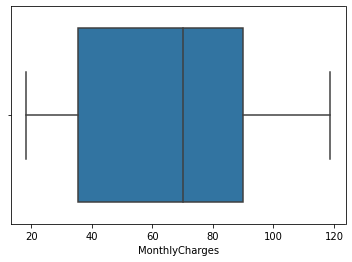

In [ ]:
df_X_train_1, limite_superior_outliers = trata_outliers(df = df_X_train_1, coluna = 'MonthlyCharges')

IQR: 3359.1000000000004
Limite inferior para outlier: -4639.35; Limite superior para outliers: 8797.050000000001
Mediana: 1392.925


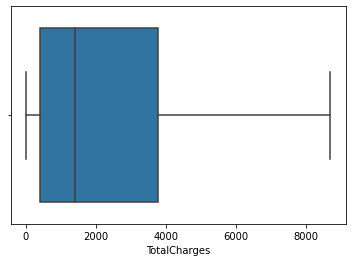

In [ ]:
df_X_train_1, limite_superior_outliers = trata_outliers(df = df_X_train_1, coluna = 'TotalCharges')

In [ ]:
df_X_train_1.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_le',
       'SeniorCitizen_le', 'Partner_le', 'Dependents_le', 'PhoneService_le',
       'MultipleLines_le', 'InternetService_le', 'OnlineSecurity_le',
       'OnlineBackup_le', 'DeviceProtection_le', 'TechSupport_le',
       'StreamingTV_le', 'StreamingMovies_le', 'Contract_le',
       'PaperlessBilling_le', 'PaymentMethod_le', 'tenure_o',
       'MonthlyCharges_o', 'TotalCharges_o'],
      dtype='object')

In [ ]:
df_y_train

0       0
1       0
2       0
3       1
4       1
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: Churn, Length: 5634, dtype: int64

In [27]:
df_X_train_1['Churn'] = df_y_train
df_X_train_1.info()

NameError: ignored

In [ ]:
# não transformar 'Churn' em categórica, tem de ser binomial
# df_X_train_1['Churn'] = df_X_train_1.['Churn'].astype('category')

In [28]:
modelo1 = smf.glm(formula = 'Churn ~ tenure + MonthlyCharges + TotalCharges + gender + SeniorCitizen + Partner + Dependents + PhoneService + MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Contract + PaperlessBilling + PaymentMethod',
                 data = df_train,
                 family = sm.families.Binomial()).fit()
print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5610
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2307.3
Date:                Sun, 15 Nov 2020   Deviance:                       4614.6
Time:                        15:12:13   Pearson chi2:                 5.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [41]:
df_train_1 = df_train.copy()
df_train_1 = pd.get_dummies(df_train_1, columns = ['gender', 'TechSupport'])

In [43]:
df_train_1.columns

Index(['id', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Female', 'gender_Male',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')

In [50]:
df_train_1.rename({'TechSupport_No internet service':'TechSupport_No_internet_service'}, axis = 1, inplace=True)

In [57]:
df_train_1.columns

Index(['id', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'TechSupport_No',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'MultipleLines_No', 'MultipleLines_No_phone_service',
       'MultipleLines_Yes'],
      dtype='object')

In [56]:
#df_train_1 = pd.get_dummies(df_train_1, columns = ['MultipleLines'])
df_train_1.rename({'MultipleLines_No phone service':'MultipleLines_No_phone_service'}, axis = 1, inplace=True)

In [69]:
# eliminando TotalCharges
modelo1 = smf.glm(formula = 'Churn ~ tenure + MonthlyCharges + gender + SeniorCitizen + Partner + Dependents + PhoneService + MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + Contract + PaperlessBilling + PaymentMethod',
                 data = df_train,
                 family = sm.families.Binomial()).fit()
print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5611
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2307.4
Date:                Sun, 15 Nov 2020   Deviance:                       4614.7
Time:                        16:10:48   Pearson chi2:                 5.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [70]:
df_train.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   tenure               5634 non-null   float64 
 1   MonthlyCharges       5634 non-null   float64 
 2   TotalCharges         5634 non-null   float64 
 3   gender_le            5634 non-null   category
 4   SeniorCitizen_le     5634 non-null   category
 5   Partner_le           5634 non-null   category
 6   Dependents_le        5634 non-null   category
 7   PhoneService_le      5634 non-null   category
 8   MultipleLines_le     5634 non-null   category
 9   InternetService_le   5634 non-null   category
 10  OnlineSecurity_le    5634 non-null   category
 11  OnlineBackup_le      5634 non-null   category
 12  DeviceProtection_le  5634 non-null   category
 13  TechSupport_le       5634 non-null   category
 14  StreamingTV_le       5634 non-null   category
 15  StreamingMovies_le   

In [ ]:
df_y_train

0       0
1       0
2       0
3       1
4       1
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: Churn, Length: 5634, dtype: int64

In [ ]:
type(df_y_train)

pandas.core.series.Series

In [62]:
print(np.exp(modelo1.params[1:]))

Partner[T.Yes]                               0.892316
Dependents[T.Yes]                            0.863264
PhoneService[T.Yes]                          1.863413
InternetService[T.Fiber optic]              10.809657
InternetService[T.No]                        0.768812
OnlineSecurity[T.No internet service]        0.768812
OnlineSecurity[T.Yes]                        0.861918
OnlineBackup[T.No internet service]          0.768812
OnlineBackup[T.Yes]                          1.106997
DeviceProtection[T.No internet service]      0.768812
DeviceProtection[T.Yes]                      1.274109
StreamingTV[T.No internet service]           0.768812
StreamingTV[T.Yes]                           2.339645
StreamingMovies[T.No internet service]       0.768812
StreamingMovies[T.Yes]                       2.305802
Contract[T.One year]                         0.447687
Contract[T.Two year]                         0.209283
PaperlessBilling[T.Yes]                      1.440704
PaymentMethod[T.Credit card 

In [ ]:
df_X_train_2 = df_X_train_1[['Churn','SeniorCitizen_le', 'MultipleLines_le','InternetService_le','OnlineSecurity_le',
                            'OnlineBackup_le','DeviceProtection_le','TechSupport_le', 'StreamingTV_le','StreamingMovies_le',
                            'Contract_le','tenure','PaperlessBilling_le']]
df_X_train_2.head()

,Churn,SeniorCitizen_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,tenure,PaperlessBilling_le
0,0,0,1,0,2,2,2,2,0,0,2,56.0,0
1,0,0,0,2,1,1,1,1,1,1,1,29.0,0
2,0,0,2,1,0,2,2,2,2,2,2,60.0,1
3,1,0,2,1,0,2,2,0,2,2,0,37.0,1
4,1,0,0,1,0,0,0,0,0,0,0,29.0,1


In [64]:
modelo2 = LogisticRegression(penalty='none', solver='newton-cg')
y = df_y_train
X = df_train_1.drop('Churn',axis=1)

In [65]:
X.shape

(5634, 25)

In [66]:
y.shape

(5634,)

In [67]:
modelo2.fit(X, y)

ValueError: ignored

In [ ]:
#y_pred = modelo2.predict_proba(X)
#y_pred

In [ ]:
X_teste.shape

(1409, 19)

In [ ]:
X_teste.head()

,tenure,MonthlyCharges,TotalCharges,gender_le,SeniorCitizen_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,23.0,20.00,445.30,1,0,1,1,1,0,2,1,1,1,1,1,1,1,1,1
1,61.0,99.00,5969.30,1,1,1,1,1,2,1,0,2,0,0,2,2,1,0,3
2,36.0,84.75,3050.15,1,0,0,0,1,2,1,0,0,0,0,0,2,0,1,2
3,61.0,61.45,3751.15,0,0,1,1,0,1,0,0,2,2,2,2,2,2,1,0
4,47.0,20.55,945.70,0,0,0,0,1,0,2,1,1,1,1,1,1,2,1,4


In [ ]:
X_teste_2 = X_teste[['SeniorCitizen_le', 'MultipleLines_le','InternetService_le','OnlineSecurity_le',
                     'OnlineBackup_le','DeviceProtection_le','TechSupport_le', 'StreamingTV_le','StreamingMovies_le',
                     'Contract_le','tenure','PaperlessBilling_le']]
X_teste_2.shape

(1409, 12)

In [ ]:
y_pred = modelo2.predict(X_teste_2)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[579, 155],
       [540, 135]])

In [ ]:
acuracia = accuracy_score(y_test, y_pred)
acuracia

0.5067423704755145

In [ ]:
print(classification_report(y, modelo2.predict(X)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4139
           1       0.65      0.50      0.57      1495

    accuracy                           0.80      5634
   macro avg       0.74      0.70      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.79      0.62       734
           1       0.47      0.20      0.28       675

    accuracy                           0.51      1409
   macro avg       0.49      0.49      0.45      1409
weighted avg       0.49      0.51      0.46      1409



In [ ]:
df_submit = pd.DataFrame(y_pred, columns = ['Churn'])

In [ ]:
df_submit.value_counts()

Churn
0        1119
1         290
dtype: int64

In [ ]:
y_test.value_counts()

0    734
1    675
Name: Churn, dtype: int64

In [ ]:
plot_roc_curve(y, y_pred)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
mms = MinMaxScaler()
rs = RobustScaler()

In [ ]:
df_X_train_1_2.columns

In [ ]:
# fit
df_X_train_1_2_mms = pd.DataFrame(mms.fit_transform(df_X_train_1_2[['tenure']]), columns = ['tenure_mms'])
df_X_train_1_2_rs = pd.DataFrame(rs.fit_transform(df_X_train_1_2[['tenure']]), columns = ['tenure_rs'])

df_X_train_1_2['tenure_mms'] = df_X_train_1_2_mms['tenure_mms']
df_X_train_1_2['tenure_rs']= df_X_train_1_2_rs['tenure_rs']

df_X_train_1_2.head()

In [ ]:
df_X_train_1_2.describe()

In [ ]:
df_X_train_1.shape

(5634, 23)

In [ ]:
X.shape

(5634, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(df_X_train_1, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_2 = logreg.predict(X_teste_2)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_teste_2, y_pred_2)))

Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, df_X_train_1, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

10-fold cross validation average accuracy: 0.979


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
